# Example 01: MNIST Demo

In [1]:
import sys
sys.path.append('./../')
import matplotlib
%matplotlib inline
import visualisation

/home/alex/anaconda2/envs/ANT/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## (i) Train an ANT on MNIST
From the code directory, run the following command to train an ANT:

```bash
python tree.py --dataset mnist \ # dataset
               --experiment demo --subexperiment ant_mnist \ # experiment names
               --batch-size 256 --epochs_patience 5 \ # training
               --epochs_node 50 --epochs_finetune 100 \ 
               -t_ver 3 -t_ngf 5 -t_k 3 \ # transformer module config
               -r_ver 6 -r_ngf 5 -r_k 3 \ # router module config 
               -s_ver 4 \ # solver module config 
               -ds_int 1 --maxdepth 10 \ # other model config 
               --visualise_split --num_workers 0 --seed 1  # miscellaneous 
```

It takes less than 1.5 hours on a single Titan X GPU.

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

465
465
ant_mnist: test accuracy = 94.94


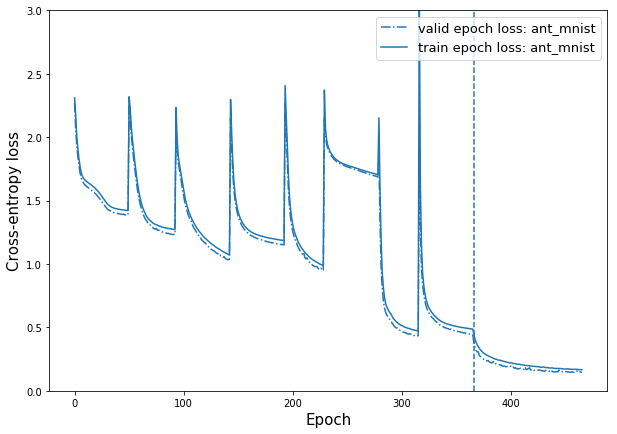

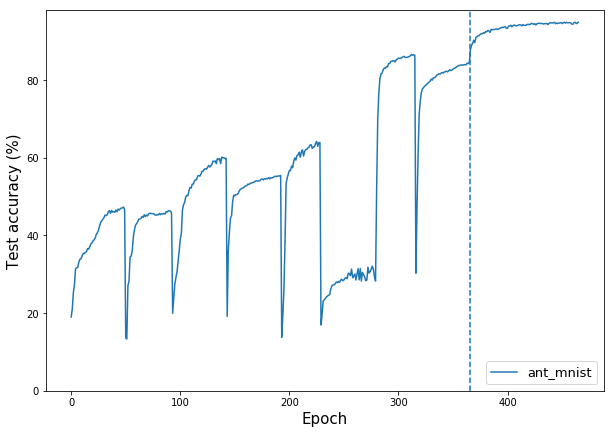

In [2]:
exp_dir = './../experiments/mnist/demo/'
models_list = ['ant_mnist']

records_file_list = [exp_dir + model_name + '/checkpoints/records.json' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

visualisation.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualisation.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [3]:
_ = visualisation.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: ant_mnist
Number of parameters summary:
    Total: 798 
    Max per branch: 798 
    Min per branch: 798 
    Average per branch: 798.0


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_finetune.png


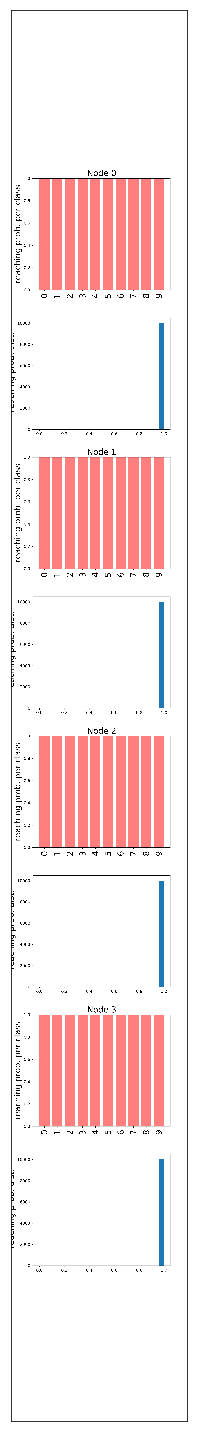

In [17]:
fig_dir = exp_dir + 'ant_mnist' + '/figures/'
visualisation.visualise_treestructures(fig_dir, figsize=(10,20))